#### Data set cleaning

Dataset: 

 - _games.csv_

Author: Luis Sergio Pastrana Lemus  
Date: 2025-05-29

# Data Cleaning – Mobile Service Dataset

## __1. Libraries__

In [1]:
from pathlib import Path
import sys

# Define project root dynamically, gets the current directory from which the notebook belongs and moves one level upper
project_root = Path.cwd().parent

# Add src to sys.path if it is not already
if str(project_root) not in sys.path:

    sys.path.append(str(project_root))

# Import function directly (more controlled than import *)
from src import *


from IPython.display import display, HTML
import os
import pandas as pd

## __2. Path to Data file__

In [2]:
# Build route to data file and upload

data_file_path = project_root / "data" / "raw"

df_vg = load_dataset_from_csv(data_file_path, "games.csv", header='infer', keep_default_na=False)
df_vg_name_platform_year = load_dataset_from_csv(data_file_path, "games_with_year.csv", header='infer', keep_default_na=False)

##### `LSPL`

**Note:** `keep_default_na=False` is used to later convert missing values to `pd.NA`.  
This is beneficial because `pd.NA` provides:

- Consistency across data types  
- Type integrity preservation  
- Cleaner logical operations  
- Improved control over missing data

Since high performance or heavy computation is not required here, using `pd.NA` is appropriate.

In [3]:
# Format notebook output
format_notebook()

## __3. Data set cleaning__

In [4]:
df_vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16715 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16715 non-null  object 
 3   Genre            16715 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     16715 non-null  object 
 9   User_Score       16715 non-null  object 
 10  Rating           16715 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


### 3.1. Standardizing String values using "snake case"

#### 3.1.1 Standardizing Column Labels

In [5]:
# Standardize column labels with snake_case format
df_vg = normalize_columns_headers_format(df_vg)
df_vg.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'], dtype='object')

#### 3.1.2 Standardizing Dataframe String values

In [6]:
# Standardize data frame string values with snake_case format
df_vg = normalize_string_format(df_vg, exclude=['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'])
df_vg

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii_sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super_mario_bros,nes,1985.0,platform,29.08,3.58,6.81,0.77,,,
2,mario_kart_wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii_sports_resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon_red_pokemon_blue,gb,1996.0,role_playing,11.27,8.89,10.22,1.00,,,
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai_warriors_sanada_maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,,,
16711,lma_manager_2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,,,
16712,haitaka_no_psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,,,
16713,spirits_spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,,,


##### `LSPL`

**Note:** 

The column names and string values did not follow a consistent format; they contained spaces and capital letters, making them difficult to manipulate.

__Solution__: Column names and string values were standardized using lowercase letters, removing spaces, and applying the snake_case format.   
__Impact__: This facilitated data access and manipulation, improving readability and reducing errors in analysis.

### 3.2 Explicit duplicates

In [7]:
# Show explicit duplicates amount
display(HTML(f"> Explicit duplicates amount Dataframe <i>'df_vg'</i>: <b>{df_vg.duplicated().sum()}</b>"))

In [8]:
# Delete explicit duplicated rows
# No explicit duplicates exist within df_vg

##### `LSPL`

**Note:** 

No explicit duplicate rows were detected.

### 3.3 Missing values

#### 3.3.1 Missing values check

In [9]:
# Show missing values
check_existing_missing_values(df_vg)

#### 3.3.2 Replacing missing values (pd.NA)

In [10]:
# Replace missing values with pd.NA
df_vg = replace_missing_values(df_vg, include=['name', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating'])
df_vg

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii_sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super_mario_bros,nes,1985.0,platform,29.08,3.58,6.81,0.77,<NA>,<NA>,<NA>
2,mario_kart_wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii_sports_resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon_red_pokemon_blue,gb,1996.0,role_playing,11.27,8.89,10.22,1.00,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai_warriors_sanada_maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,<NA>,<NA>,<NA>
16711,lma_manager_2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,<NA>,<NA>,<NA>
16712,haitaka_no_psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,<NA>,<NA>,<NA>
16713,spirits_spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,<NA>,<NA>,<NA>


#### 3.3.3 Preview missing values

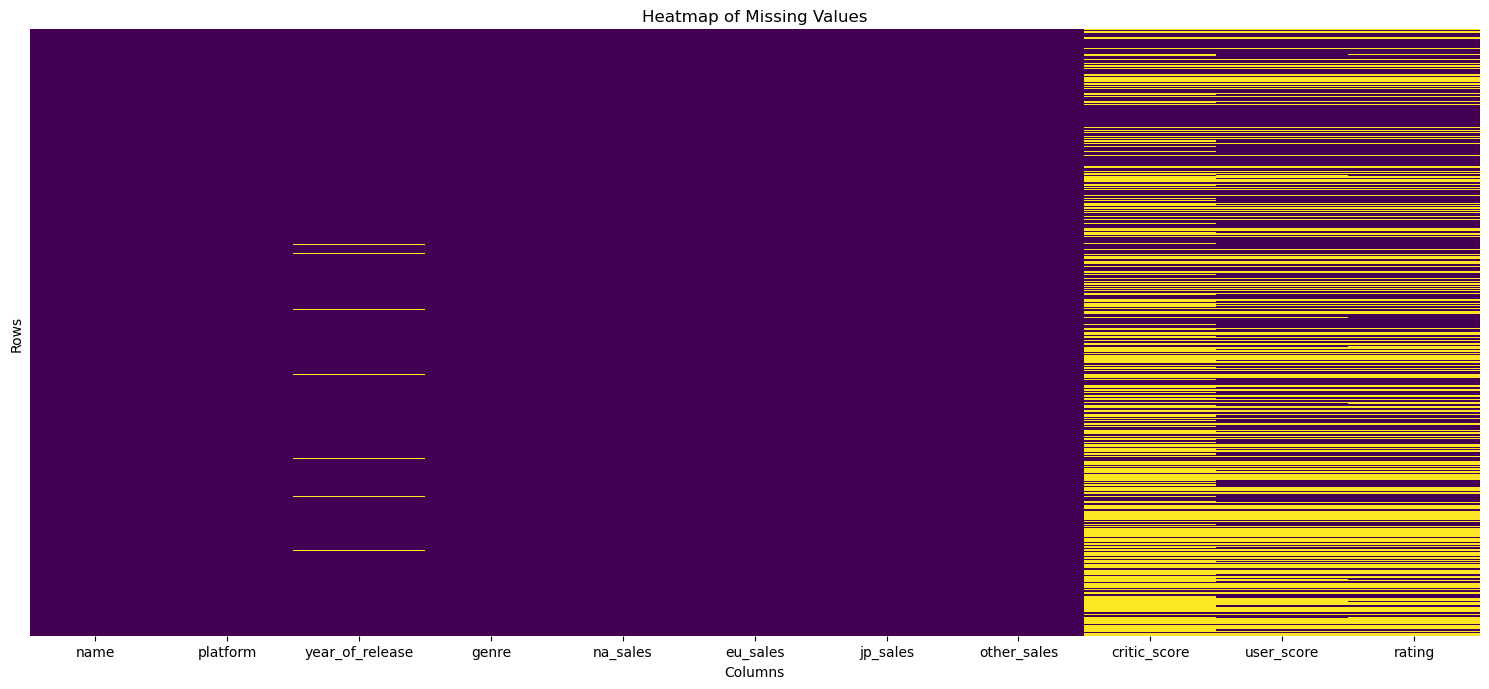

In [11]:
# Show missing values heatmap
missing_values_heatmap(df_vg)

#### 3.3.4  Missing values data imputation

##### 3.3.4.1  Missing values data imputation for 'name' column

In [12]:
# Show pd.NA missing values for 'name' column
df_vg.loc[df_vg['name'].isna(), :]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,<NA>,gen,1993.0,<NA>,1.78,0.53,0.00,0.08,<NA>,<NA>,<NA>
14244,<NA>,gen,1993.0,<NA>,0.00,0.00,0.03,0.00,<NA>,<NA>,<NA>


In [13]:
# Missing values in 'name' and 'genre' occur in the same records, which still contain relevant data. 
# To preserve them, missing values will be filled with 'unknown' instead of being dropped.
df_vg['name'] = df_vg['name'].fillna('unknown')
df_vg.iloc[[659, 14244], :]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,gen,1993.0,<NA>,1.78,0.53,0.00,0.08,<NA>,<NA>,<NA>
14244,unknown,gen,1993.0,<NA>,0.00,0.00,0.03,0.00,<NA>,<NA>,<NA>


##### 3.3.4.2  Missing values data imputation for 'genre' column

In [14]:
# Show pd.NA missing values for 'genre' column
df_vg.loc[df_vg['genre'].isna(), :]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,gen,1993.0,<NA>,1.78,0.53,0.00,0.08,<NA>,<NA>,<NA>
14244,unknown,gen,1993.0,<NA>,0.00,0.00,0.03,0.00,<NA>,<NA>,<NA>


In [15]:
# Missing values in 'name' and 'genre' occur in the same records, which still contain relevant data. 
# To preserve them, missing values will be filled with 'unknown' instead of being dropped.
df_vg['genre'] = df_vg['genre'].fillna('unknown')
df_vg.iloc[[659, 14244], :]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,gen,1993.0,unknown,1.78,0.53,0.00,0.08,<NA>,<NA>,<NA>
14244,unknown,gen,1993.0,unknown,0.00,0.00,0.03,0.00,<NA>,<NA>,<NA>


##### 3.3.4.3  Missing values data imputation for 'year_of_release' column

In [16]:
# Show pd.NA missing values for 'year_of_release' column
df_vg.loc[df_vg['year_of_release'].isna(), :]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden_nfl_2004,ps2,<NA>,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa_soccer_2004,ps2,<NA>,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego_batman_the_videogame,wii,<NA>,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe_smackdown_vs_raw_2006,ps2,<NA>,fighting,1.57,1.02,0.00,0.41,<NA>,<NA>,<NA>
609,space_invaders,2600,<NA>,shooter,2.36,0.14,0.00,0.03,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc_world_championship_darts_2008,psp,<NA>,sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,freaky_flyers,gc,<NA>,racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,pc,<NA>,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki_shinsengumi_kitan,ps3,<NA>,adventure,0.01,0.00,0.00,0.00,<NA>,<NA>,<NA>


In [ ]:
# Percentage of null values ​​in column 'year_of_release'
display(HTML(f"> Percentage of null values for column <i>'year_of_release'</i>: \
             <b>{(df_vg['year_of_release'].isna().sum() / len(df_vg['year_of_release']) * 100):.2f}</b> %"))

In [18]:
# name_plataform_games.csv is created to get all the games with no year_of_release information
df_name_platform_games = df_vg.loc[df_vg['year_of_release'].isna(), ['name', 'platform']]
df_name_platform_games.to_csv('../data/raw/name_platform_games.csv', index=False)

In [19]:
df_vg_name_platform_year

,name,platform,release_year
0,madden_nfl_2004,ps2,2003
1,fifa_soccer_2004,ps2,2003
2,lego_batman_the_videogame,wii,2008
3,wwe_smackdown_vs_raw_2006,ps2,2005
4,space_invaders,2600,1980
...,...,...,...
264,pdc_world_championship_darts_2008,psp,9387
265,freaky_flyers,gc,2003
266,inversion,pc,unknown
267,hakuouki_shinsengumi_kitan,ps3,unknown


In [20]:
df_vg = df_vg.merge(df_vg_name_platform_year[['name', 'platform', 'release_year']], on=['name', 'platform'], how='left')
df_vg['year_of_release'] = df_vg['year_of_release'].fillna(df_vg['release_year'])
df_vg = df_vg.drop(columns='release_year')
df_vg

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii_sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super_mario_bros,nes,1985.0,platform,29.08,3.58,6.81,0.77,<NA>,<NA>,<NA>
2,mario_kart_wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii_sports_resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon_red_pokemon_blue,gb,1996.0,role_playing,11.27,8.89,10.22,1.00,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai_warriors_sanada_maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,<NA>,<NA>,<NA>
16711,lma_manager_2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,<NA>,<NA>,<NA>
16712,haitaka_no_psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,<NA>,<NA>,<NA>
16713,spirits_spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,<NA>,<NA>,<NA>


##### `LSPL`

**Note:** 

The file name_platform_games.csv was created as a base to identify missing release years. Using search.py, external sources were queried to retrieve this data, which was subsequently merged into df_vg.

##### 3.3.4.4  Missing values data imputation for 'critic_score' column

In [21]:
# Show pd.NA missing values for 'critic_score' column
df_vg.loc[df_vg['critic_score'].isna(), :]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super_mario_bros,nes,1985.0,platform,29.08,3.58,6.81,0.77,<NA>,<NA>,<NA>
4,pokemon_red_pokemon_blue,gb,1996.0,role_playing,11.27,8.89,10.22,1.00,<NA>,<NA>,<NA>
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,<NA>,<NA>,<NA>
9,duck_hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,<NA>,<NA>,<NA>
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai_warriors_sanada_maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,<NA>,<NA>,<NA>
16711,lma_manager_2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,<NA>,<NA>,<NA>
16712,haitaka_no_psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,<NA>,<NA>,<NA>
16713,spirits_spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,<NA>,<NA>,<NA>


In [22]:
# Percentage of null values ​​in column 'critic_score'
display(HTML(f"> Percentage of null values for column <i>'critic_score'</i>: \
             <b>{(df_vg['critic_score'].isna().sum() / len(df_vg['critic_score']) * 100):.2f}</b> %"))

In [23]:
# Imputation for those games multiplatform, missing values in 'critic_score' will be taken from the same game other platforms mode
df_vg_name_paltform_cs = df_vg.loc[:, ['name', 'platform', 'critic_score']]
df_vg_name_paltform_cs = df_vg_name_paltform_cs.drop_duplicates()
df_vg_name_paltform_cs = df_vg_name_paltform_cs.dropna()
df_vg_name_paltform_cs = (df_vg_name_paltform_cs.groupby('name')['critic_score'].agg(lambda x: x.mode().iloc[0]))
df_vg_name_paltform_cs

name
007_quantum_of_solace          65.0
007_racing                     51.0
007_the_world_is_not_enough    61.0
100_classic_books              70.0
101_in_1_explosive_megamix     46.0
                               ... 
zubo                           75.0
zumba_fitness                  42.0
zumba_fitness_core             77.0
zumba_fitness_rush             73.0
zumba_fitness_world_party      73.0
Name: critic_score, Length: 5080, dtype: object

In [24]:
df_vg['critic_score'] = df_vg['critic_score'].fillna(df_vg['name'].map(df_vg_name_paltform_cs))
df_vg


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii_sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super_mario_bros,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,<NA>,<NA>
2,mario_kart_wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii_sports_resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon_red_pokemon_blue,gb,1996.0,role_playing,11.27,8.89,10.22,1.00,NaN,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai_warriors_sanada_maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,<NA>,<NA>
16711,lma_manager_2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,<NA>,<NA>
16712,haitaka_no_psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,<NA>,<NA>
16713,spirits_spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,<NA>,<NA>


##### 3.3.4.5  Missing values data imputation for 'user_score' column

In [25]:
# Show pd.NA missing values for 'user_score' column
df_vg.loc[df_vg['user_score'].isna(), :]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super_mario_bros,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,<NA>,<NA>
4,pokemon_red_pokemon_blue,gb,1996.0,role_playing,11.27,8.89,10.22,1.00,NaN,<NA>,<NA>
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,<NA>,<NA>
9,duck_hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,<NA>,<NA>
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai_warriors_sanada_maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,<NA>,<NA>
16711,lma_manager_2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,<NA>,<NA>
16712,haitaka_no_psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,<NA>,<NA>
16713,spirits_spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,<NA>,<NA>


In [26]:
# Percentage of null values ​​in column 'user_score'
display(HTML(f"> Percentage of null values ​​for column <i>'user_score'</i>: \
             <b>{(df_vg['user_score'].isna().sum() / len(df_vg['user_score']) * 100):.2f}</b> %"))

In [27]:
# Imputation for those games multiplatform, missing values in 'user_score' will be taken from the same game other platforms mode
df_vg_name_paltform_us = df_vg.loc[:, ['name', 'platform', 'user_score']]
df_vg_name_paltform_us = df_vg_name_paltform_us.drop_duplicates()
df_vg_name_paltform_us = df_vg_name_paltform_us.dropna()
df_vg_name_paltform_us = (df_vg_name_paltform_us.groupby('name')['user_score'].agg(lambda x: x.mode().iloc[0]))
df_vg_name_paltform_us

name
007_quantum_of_solace          6.3
007_racing                     4.6
007_the_world_is_not_enough    6.7
1001_touch_games               tbd
100_all_time_favorites         6.2
                              ... 
zumba_fitness                  3.8
zumba_fitness_2                tbd
zumba_fitness_core             6.7
zumba_fitness_rush             6.2
zumba_fitness_world_party      6.2
Name: user_score, Length: 6112, dtype: object

In [28]:
df_vg['user_score'] = df_vg['user_score'].fillna(df_vg['name'].map(df_vg_name_paltform_us))
df_vg

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii_sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super_mario_bros,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,<NA>
2,mario_kart_wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii_sports_resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon_red_pokemon_blue,gb,1996.0,role_playing,11.27,8.89,10.22,1.00,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai_warriors_sanada_maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,<NA>
16711,lma_manager_2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,<NA>
16712,haitaka_no_psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,<NA>
16713,spirits_spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,<NA>


##### 3.3.4.6  Missing values data imputation for 'rating' column

In [ ]:
# Show pd.NA missing values for 'rating' column
df_vg.loc[df_vg['rating'].isna(), :]

##### `LSPL`

**Note:** 

1. Missing values in __df_xxx__, _'column_name'_ column

Missing values in the `column_name` column occur ...

__Solution__: All missing values in `columns_name` will be ....

__Impact__: Identifying users with pd.NA, will help ...



### 3.4 Implicit duplicates

#### 3.4.1 Implicit duplicates check

In [ ]:
# Show implicit duplicates df_aisles
detect_implicit_duplicates_fuzzy(df_xxx, 'column_name')

#### 3.4.2 Implicit duplicates data imputation

In [ ]:
# Imputation

### 3.5 Casting data types

#### 3.5.1 Casting to string data type

In [ ]:
# df_xxx 'column_name' to string
df_xxx['column_name'] = df_xxx['column_name'].astype('string')
df_xxx['column_name'].dtypes

#### 3.5.2 Casting to numeric data type

In [ ]:
# df_xxx 'column_name' to numeric
find_fail_conversion_to_numeric(df_xxx, 'column_name')

df_xxx = convert_object_to_numeric(
    df_xxx, type='integer', include=['column_name'])
df_xxx['column_names'].dtypes

#### 3.5.3 Casting to category data type

In [ ]:
# df_xxx 'column_name' to category
df_xxx['column_name'] = df_xxx['column_name'].astype('category')
df_xxx['column_name'].dtypes

#### 3.5.4 Casting to boolean data type

In [ ]:
# df_xxx 'column_name' to boolean
df_xxx = convert_integer_to_boolean(df_xxx, include=['column_name'])

#### 3.5.5 Casting to datetime data type

In [ ]:
# df_xxx 'column_name' to datetime
df_xxx = normalize_datetime(
    df_xxx, include=['column_name'], frmt='%Y-%m-%dT%H:%M:%S')
df_xxx.dtypes

## __4. Final cleaning dataframe review__

In [ ]:
df_xxx.info()

## __5. Generate a new clean Data set .csv file__

In [ ]:
project_root = Path.cwd().parent
processed_path = project_root / "data" / "processed" / "clean" / "_clean.csv"
df_xxx.to_csv(processed_path, index=False)